In [1]:
import pandas as pd 
import numpy as np 
from glob import glob 

In [2]:
import utils 

In [3]:
df=pd.read_csv("../data/fma_metadata/tracks.csv")
df

/tmp/ipykernel_1870/3077391001.py:1: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../data/fma_metadata/tracks.csv")


,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106571,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106572,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106573,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106574,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


In [4]:
tracks = utils.load('../data/fma_metadata/tracks.csv')
genres = utils.load('../data/fma_metadata/genres.csv')
features = utils.load('../data/fma_metadata/features.csv')
echonest = utils.load('../data/fma_metadata/echonest.csv')

In [5]:
tracks["set","split"]=="training"

track_id
2          True
3          True
5          True
10         True
20         True
          ...  
155316     True
155317     True
155318     True
155319     True
155320    False
Name: (set, split), Length: 106574, dtype: bool

In [14]:
import librosa 
import IPython.display as ipd
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = (15, 10)

In [7]:
filename = utils.get_audio_path("../data/fma_small/", 2)

In [8]:
filename

'../data/fma_small/000/000002.mp3'

In [9]:
x, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

Duration: 29.98s, 1321967 samples


In [46]:
start, end = 7, 17
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

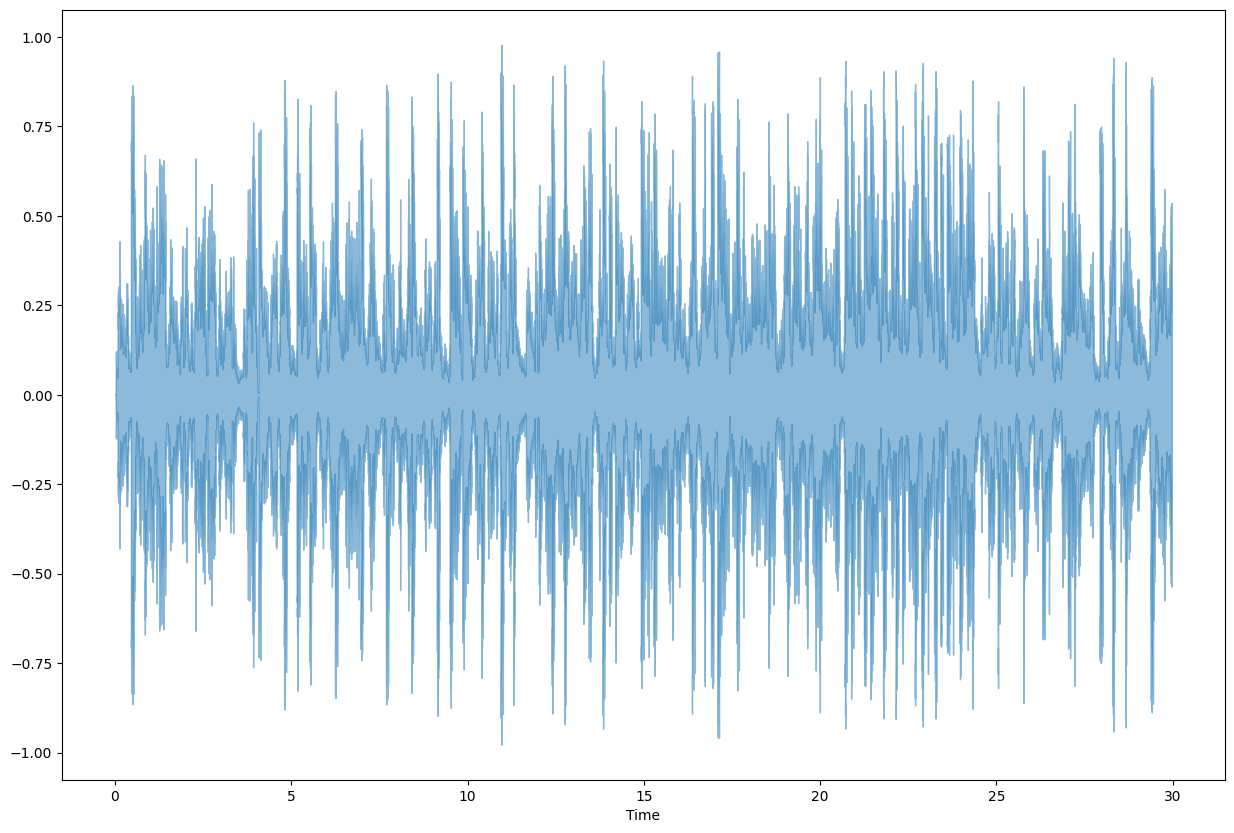

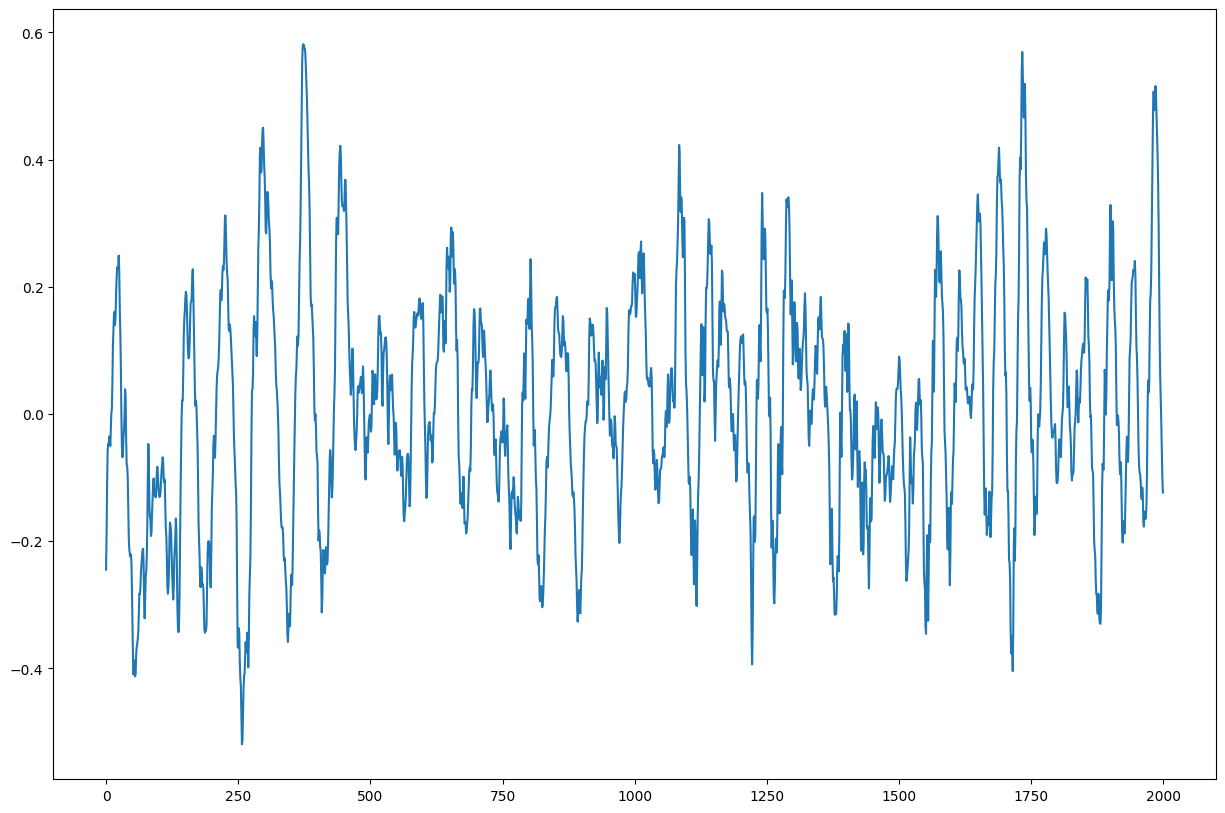

In [22]:
fig=librosa.display.waveshow(x, sr=sr,alpha=0.5)

# plt.vlines([start, end], -1, 1)
# plt.show()

# start = len(x) // 2
plt.figure()
plt.plot(x[start:start+2000])
# plt.ylim((-1, 1));

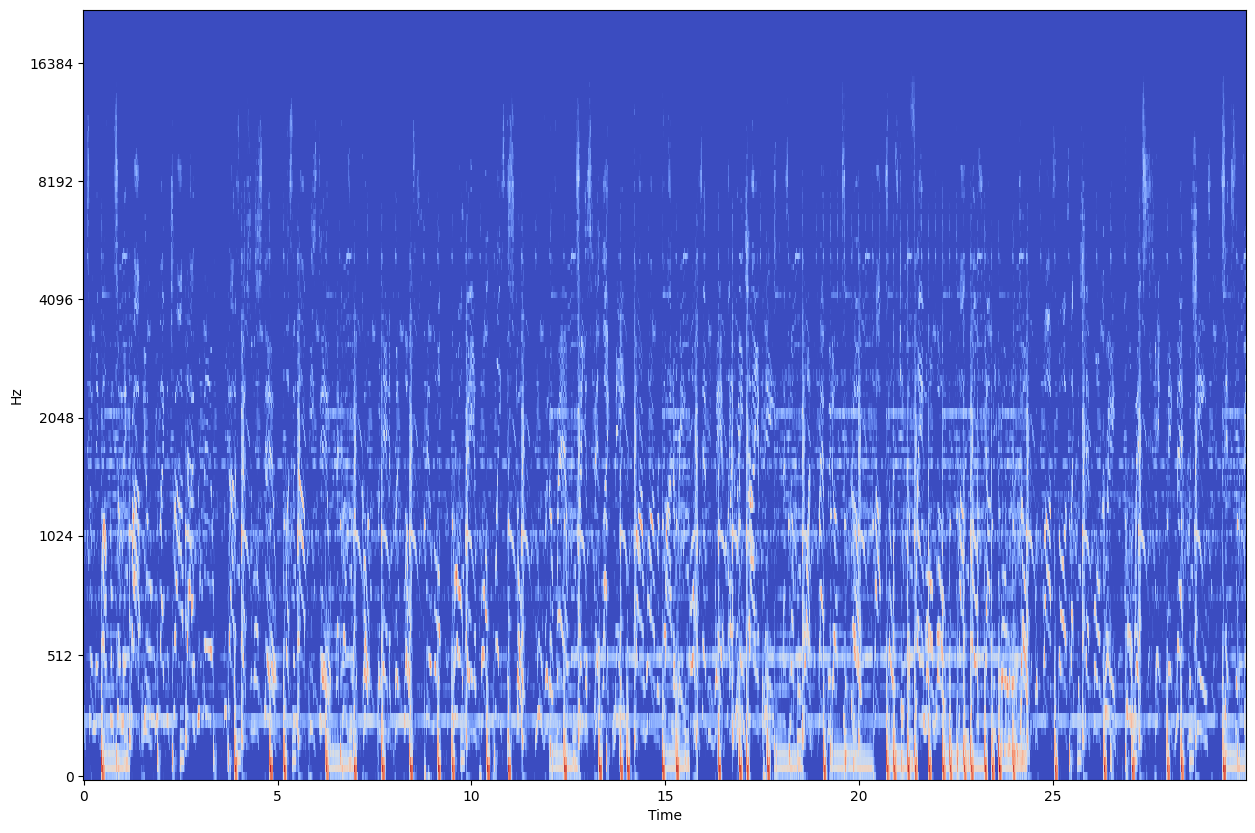

In [23]:
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
log_mel = librosa.amplitude_to_db(mel)

librosa.display.specshow(log_mel, sr=sr, hop_length=512, x_axis='time', y_axis='mel');

In [47]:
start

7

In [48]:
x[start*sr:end*sr]

array([0.49616262, 0.5399953 , 0.58472025, ..., 0.13491984, 0.12155525,
       0.1212282 ], dtype=float32)

In [68]:
mel_spectrogram=librosa.feature.melspectrogram(y=x, sr=sr,
#                                                n_fft=128,
                                               n_mels=512,
                                               fmax=20000)
mel_spectrogram

/home/prem/miniconda3/envs/melodex/lib/python3.11/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.3163004e-07, 7.3043279e-06, 4.6951077e-03, ..., 1.6267781e-01,
        7.6989573e-03, 2.3681409e+00],
       [4.5135230e-06, 3.5387708e-05, 2.2746664e-02, ..., 7.8813475e-01,
        3.7299592e-02, 1.1473072e+01],
       ...,
       [1.7221116e-15, 3.8400140e-13, 2.2757250e-12, ..., 1.9295870e-10,
        1.8551802e-10, 9.4992793e-06],
       [3.3587167e-16, 2.5246032e-13, 2.7072713e-12, ..., 3.1759309e-10,
        1.9124291e-10, 9.5617706e-06],
       [5.9012987e-16, 6.4927813e-14, 1.5671251e-12, ..., 3.4275267e-11,
        9.8112976e-11, 9.5998939e-06]], dtype=float32)

In [69]:
mel_spectrogram.shape

(512, 2582)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

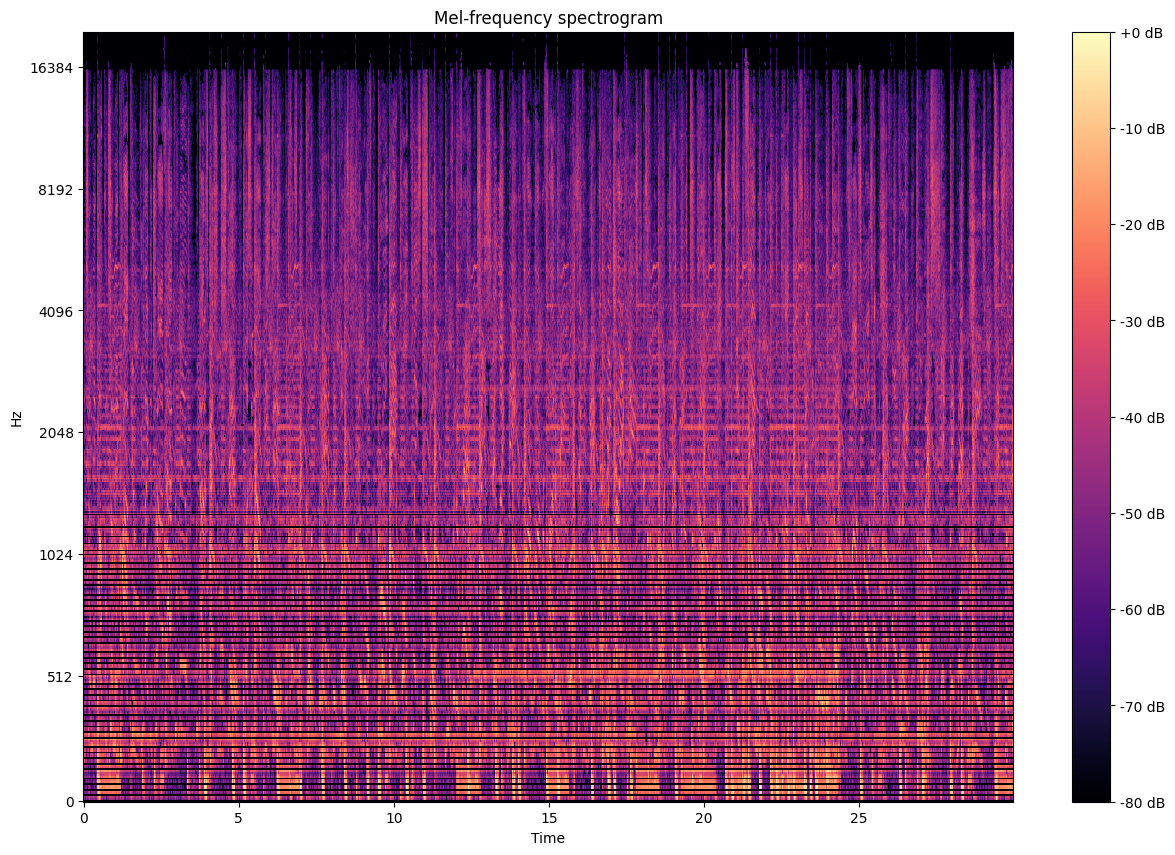

In [73]:
fig, ax = plt.subplots()
mel_spectrogram_dB = librosa.power_to_db(mel_spectrogram, ref=np.max)
img = librosa.display.specshow(mel_spectrogram_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=20000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

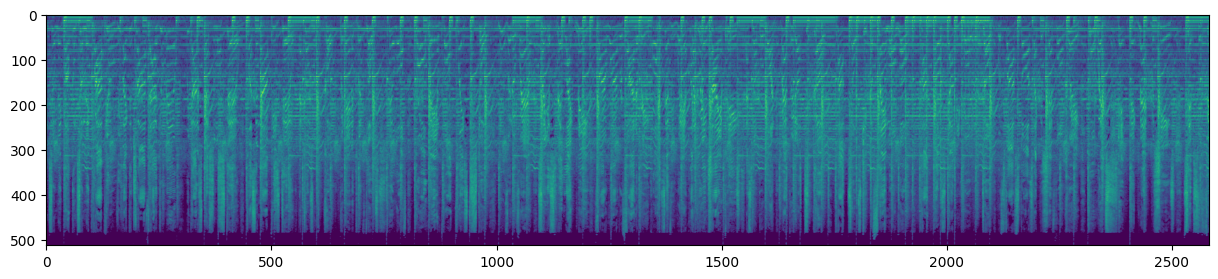

In [72]:
plt.imshow(mel_spectrogram_dB)

In [60]:
mel_spectrogram_dB.shape

(256, 862)

In [33]:
import sklearn as skl
from sklearn import preprocessing

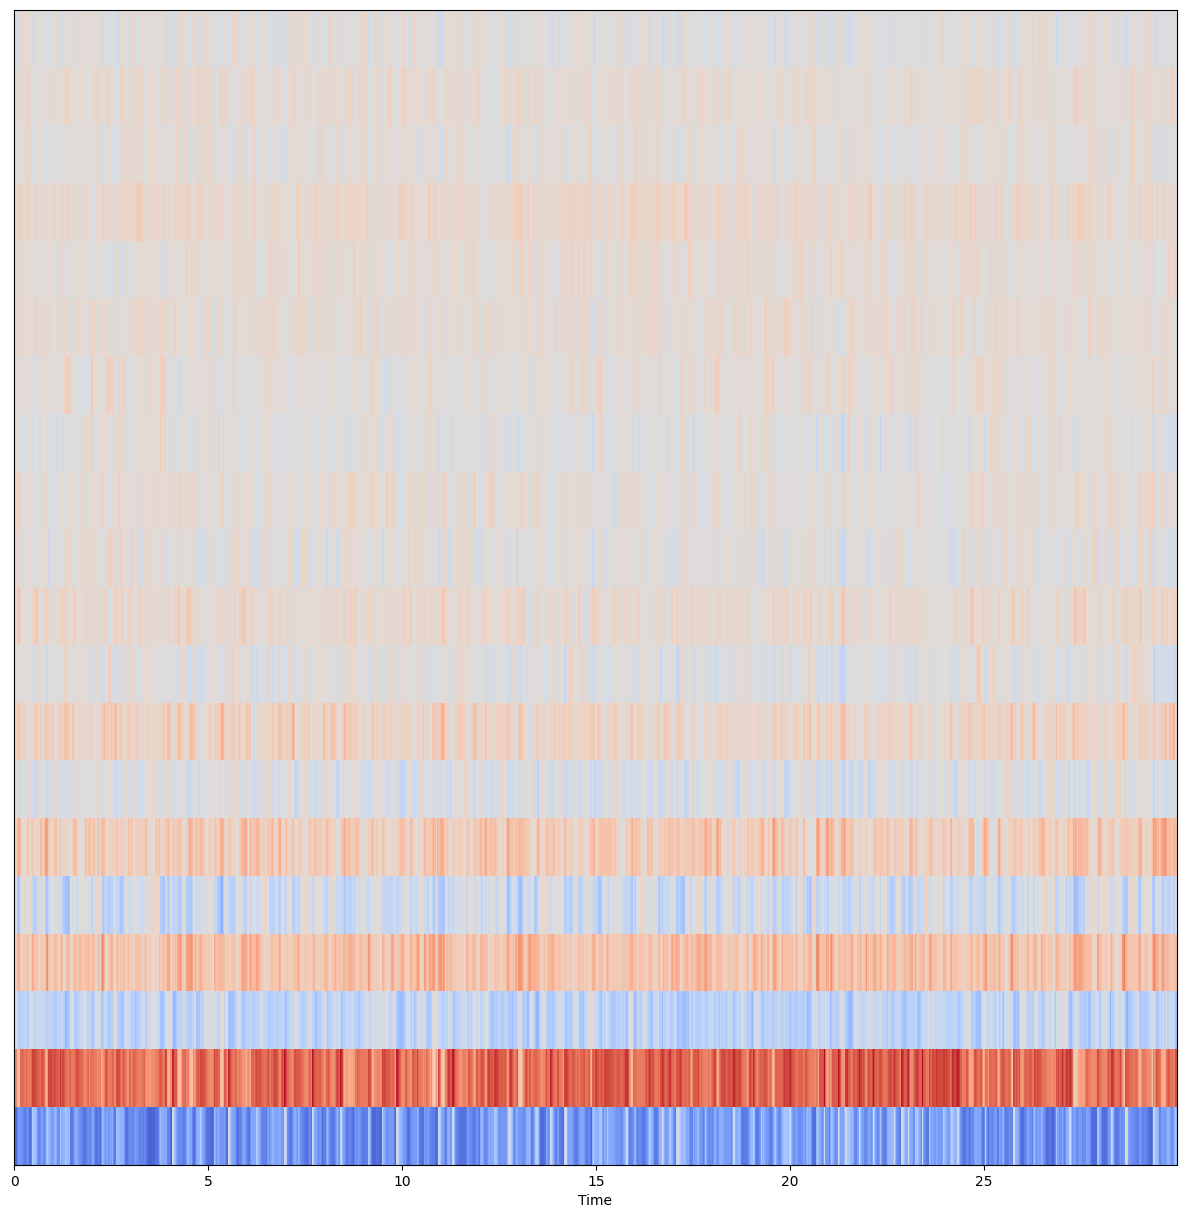

In [43]:
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)
mfcc = preprocessing.StandardScaler().fit_transform(mfcc)
librosa.display.specshow(mfcc, sr=sr, x_axis='time');